In [18]:
# importing necessary modules.
import pandas as pd
import config5 as cfg
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.ensemble import RandomForestClassifier

In [19]:
# creating a connection to an aws rds postgres cloud database.
rds_connection_string = f'postgres:{cfg.password}@test-db.cy2enoewwvsi.us-east-2.rds.amazonaws.com:5432/stocks_db'
engine = create_engine(f'postgres://{rds_connection_string}')

In [20]:
# checking out the table names in the database.
engine.table_names()

['sandp', 'russell_2000', 'sandp_russell', 'new_route']

In [21]:
# checking out the SandP_500 table.
sandp = pd.read_sql_query('SELECT * FROM sandp', con=engine)
sandp.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,gross_profit_margin,pretax_profit_margin,net_profit_margin,tax_rate,return_on_assets,return_on_equity,return_on_capital_employed,receivables_turnover_1,payables_turnover,inventory_turnover,fixed_asset_turnover,asset_turnover,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,cash_conversion_cycle,debt_ratio,debt_to_equity_ratio,longterm_debt_to_capitalization,total_debt_to_capitalization,interest_coverage,cash_flow_to_debt,company_equity_multiplier,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,payout_ratio,receivables_turnover_2,operating_cash_flow_to_sales,free_cash_flow_to_operating_cash_flow,cash_flow_coverage_ratio,short_term_coverage_ratio,capital_expenditure_coverage_ratio,dividend_capex_coverage_ratio,dividend_payout_ratio,gross_profit_growth,ebit_growth,operating_income_growth,net_income_growth,eps_growth,eps_diluted_growth,weighted_average_share_growth,weighted_averages_shares_diluted_growth,dividents_per_share_growth,operating_cash_flow_growth,free_cash_flow_growth,ten_year_revenue_growth_per_share,five_year_revenue_growth_per_share,three_year_revenue_growth_per_share,ten_year_operating_cf_growth_per_share,five_year_operating_cf_growth_per_share,three_year_operating_cf_growth_per_share,ten_year_net_income_growth_per_share,five_year_net_income_growth_per_share,three_year_net_income_growth_per_share,ten_year_shareholders_equity_growth_per_share,five_year_shareholders_equity_growth_per_share,three_year_shareholders_equity_growth_per_share,ten_year_dividend_growth_per_share,five_year_dividend_growth_per_share,three_year_dividend_growth_per_share,receivables_growh,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,percent_return_on_investment,above_below_sandp_return,market_cap,industry,sector
0,A,"Agilent Technologies, Inc.",2.55170,5.17165,1.48130,6.30885,7.0014,18.1807,13.57995,16.746223,0.524850,0.057228,0.059362,2.720066,0.07990,0.09975,0.05130,7.0014,3.85290,8.03380,5.429030,0.575072,2.7640,2.894055,2.481972,-97.99795,53.36445,-99.0,29.23140,-99.0,0.38115,1.15130,0.470496,0.535164,4.6439,0.167487,3.020614,1.62420,1.27630,11.89585,-99.000,7.0014,0.111470,0.764976,0.167487,204.239174,4.755422,4.755422,-99.000000,-0.00225,3.19800,5.05085,11.00990,10.92090,10.75375,-0.02195,-0.02360,-99.0,0.14975,0.30285,-0.03010,0.08565,0.04200,0.04210,-0.00300,-0.06355,0.0079,0.12195,0.03385,-0.02165,0.0100,-0.00400,-99.0,-99.0,-99.0,0.11660,0.0758,0.18005,0.15185,0.31885,-0.0674,0.01880,215.407785,1,7.462700e+09,Medical Diagnostics & Research,Healthcare
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.11565,-99.00000,27.3348,-99.0000,2.20925,61.812855,0.495744,-0.018258,-0.047475,-99.000000,-0.06890,0.27010,-0.01520,27.3348,5.02710,37.66910,1.378462,0.833326,0.8190,0.687756,0.074855,-19.81890,13.11230,-99.0,19.26545,-99.0,0.45185,-3.08765,1.617521,1.486838,-0.4848,0.095474,-99.000000,3.26045,-1.85000,1.84910,-99.000,27.3348,0.051335,-0.565762,0.095474,0.746942,0.638704,0.638704,-99.000000,0.03935,0.77400,0.88765,0.49305,0.55295,0.55295,0.09755,-99.00000,-99.0,1.00075,0.16005,-0.06610,-0.12145,-0.13695,-0.15725,-0.09305,-0.27055,-99.0000,-99.00000,-99.00000,-99.00000,-99.0000,-99.00000,-99.0,-99.0,-99.0,-0.04605,0.0637,-0.00170,-0.06235,0.00975,-99.0000,0.01435,492.976589,1,6.133809e+08,Airlines,Industrials
2,AAP,"Advance Auto Parts, Inc.",2.95660,3.10380,0.70600,14.16840,57.0461,7.4185,5.46130,0.499984,0.488529,0.083949,0.049952,0.373636,0.17770,0.21080,0.18830,57.0461,1.18750,3.32580,4.919055,1.761369,1.2880,0.131360,0.068224,-215.15390,6.24180,-99.0,67.32480,-99.0,0.06650,0.15930,0.136624,0.137405,19.4966,3.425303,2.396325,7.40730,5.44300,1.05890,0.084,57.0461,0.129270,0.7348

In [22]:
# converting industry columns into 1's and 0's.
industry = pd.get_dummies(sandp['industry'])

In [23]:
# converting sector columns into 1's and 0's.
sector = pd.get_dummies(sandp['sector'])

In [24]:
# bringing everything together.
sandp = pd.concat([sandp, industry, sector], axis=1)

In [25]:
# dropping industry and sector columns.
sandp.drop(['industry', 'sector'], axis=1, inplace=True)

In [26]:
# dropping unnecessary columns.
sandp.drop(['symbol', 'name', 'percent_return_on_investment'], axis=1, inplace=True)

In [27]:
X = sandp[['price_to_bookvalue', 'price_to_book', 'price_to_sales', 'price_to_earnings', 'price_to_free_cash_flow', 'price_to_operating_cash_flow', 'operating_income_growth', 'operating_cash_flow_growth', 'free_cash_flow_growth', 'return_on_equity', 'asset_growth', 'Medical Diagnostics & Research', 'Airlines',
'Retail - Apparel & Specialty', 'Computer Hardware','Drug Manufacturers', 'Medical Distribution', 'Medical Devices','Application Software', 'Semiconductors',
'Consumer Packaged Goods', 'Business Services', 'Credit Services','Utilities - Regulated', 'Insurance - Life', 'Insurance', 'REITs',
'Brokers & Exchanges', 'Chemicals','Insurance - Property & Casualty', 'Biotechnology','Asset Management', 'Communication Services', 'Online Media',
'Health Care Plans', 'Industrial Products', 'Oil & Gas - E&P','Autos', 'Conglomerates', 'Banks','Medical Instruments & Equipment', 'Travel & Leisure',
'Packaging & Containers', 'Farm & Construction Machinery','Real Estate Services', 'Entertainment', 'Agriculture','Transportation & Logistics', 'Restaurants', 'Retail - Defensive',
'Communication Equipment', 'Oil & Gas - Integrated','Homebuilding & Construction', 'Health Care Providers','Industrial Distribution', 'Manufacturing - Apparel & Furniture',
'Metals & Mining', 'Aerospace & Defense', 'Insurance—Life','Oil & Gas - Services', 'Oil & Gas - Refining & Marketing',
'Oil & Gas - Drilling', 'Personal Services','Advertising & Marketing Services', 'Building Materials','Engineering & Construction', 'Oil & Gas - Midstream',
'Beverages - Non-Alcoholic', 'Tobacco Products','Utilities - Independent Power Producers', 'Steel','Truck Manufacturing', 'Insurance - Specialty',
'Employment Services', 'Waste Management', 'Beverages - Alcoholic','Consulting & Outsourcing', 'Forest Products']]
target = sandp['above_below_sandp_return']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, random_state=1, stratify=target)

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [30]:
 # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.607
k: 3, Train/Test Score: 0.795/0.581
k: 5, Train/Test Score: 0.755/0.641
k: 7, Train/Test Score: 0.738/0.667
k: 9, Train/Test Score: 0.721/0.658
k: 11, Train/Test Score: 0.707/0.641
k: 13, Train/Test Score: 0.684/0.632
k: 15, Train/Test Score: 0.681/0.658
k: 17, Train/Test Score: 0.667/0.658
k: 19, Train/Test Score: 0.650/0.615


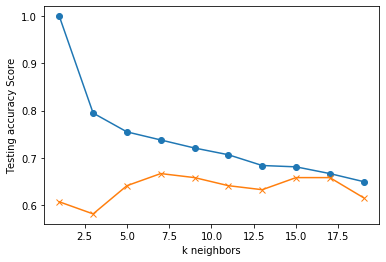

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, target_train)
    train_score = knn.score(X_train_scaled, target_train)
    test_score = knn.score(X_test_scaled, target_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [33]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, target_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, target_test))

k=9 Test Acc: 0.658


In [34]:
target_test.value_counts()

1    65
0    52
Name: above_below_sandp_return, dtype: int64

In [35]:
target.mean()

0.5512820512820513